# GROUP-05: Rachana chaudhary(18510063), Nitish goyal(18510053)

# PH509 Lab 2B

## Exploring Liouville's theorem with symplectic integrators

### Prob: A

The Euler and Euler-Cromer algorithms define a map from the $n^{th} \rightarrow (n+1)^{th}$ time steps. For a Simple Harmonic Oscillator (SHO), calculate the Jacobian of the transformation.
For this, explain why Euler algorithm is not suitable for solving the Newton's equations of motion? 

### Prob: B

For a SHO, consider a small square element of phase-space volume at $t = 0$ whose corners are labeled A, B, C and D respectively. In this exercise, we would like to follow the area enclosed as the system evolves in time. 

One way to do this is to evolve the four different initial conditions in time and plot the resultant polygon in the phase-space after regular intervals of time. For a conserved sytem, we expect this volume conserved in time. For a symplectic solver (like Euler-Cromer with a global accuracy of $\mathcal{O} (\Delta t)$), this is true. However this is not for the Euler algorithm.

__Alternately__,  consider the trajectory of a cloud of points through phase space. Show that as the cloud stretches in one coordinate – $p$ say – it shrinks in the corresponding ${q}$  direction so that the product ${ \Delta p\,\Delta q} $  remains constant.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def solve_Ek(x0,v0,t0,T,tau):
    dt=tau/10
    v=[v0]
    x=[x0]
    a=[]
    t=np.linspace(0,T,int(T/dt)+1)
    for i in range(int(T/dt)):
        a.append(0)
        a[i]=-x[i]
        v.append(0)
        v[i+1]=v[i]+a[i]*dt
        x.append(0)
        x[i+1]=x[i]+v[i+1]*dt
    return [x,v,a,t]

In [23]:
def solve_E(x0,v0,t0,T,tau):
    dt=tau/10
    v=[v0]
    x=[x0]
    a=[]
    t=np.linspace(0,T,int(T/dt)+1)
    for i in range(int(T/dt)):
        a.append(0)
        a[i]=-x[i]
        v.append(0)
        v[i+1]=v[i]+a[i]*dt
        x.append(0)
        x[i+1]=x[i]+v[i]*dt
    return [x,v,a,t]

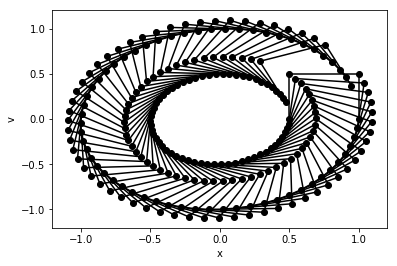

In [24]:
plt.figure(1)
x1,v1,a1,t=solve_Ek(0.5,0,0,15,1)
x2,v2,a1,t=solve_Ek(0.5,0.5,0,15,1)
x3,v3,a1,t=solve_Ek(1,0.5,0,15,1)
x4,v4,a1,t=solve_Ek(1,0,0,15,1)
l1=[]
l2=[]
A=[]

for i in range(0,60):

    l1.append((x1[i],x2[i],x3[i],x4[i]))
    l2.append((v1[i],v2[i],v3[i],v4[i]))
    plt.plot(l1[i],l2[i],'ko-')
    area=abs(.5*(x1[i]*(v2[i]-v3[i])+x2[i]*(v3[i]-v1[i])+x3[i]*(v1[i]-v2[i]))+.5*(x3[i]*(v4[i]-v1[i])+x4[i]*(v1[i]-v3[i])+x1[i]*(v3[i]-v4[i])))
    A.append(area)
plt.xlabel('x')
plt.ylabel('v')
plt.show()

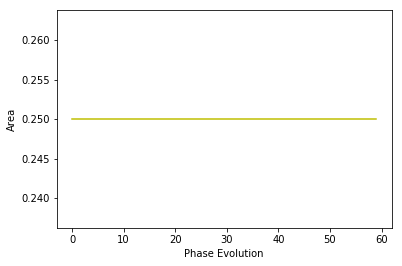

In [25]:
plt.plot(A,'y')

plt.xlabel('Phase Evolution')
plt.ylabel('Area')
plt.show()


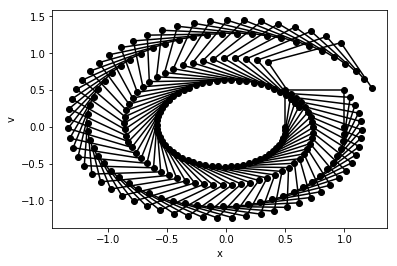

In [26]:
plt.figure(1)
x1,v1,a1,t=solve_E(0.5,0,0,15,1)
x2,v2,a1,t=solve_E(0.5,0.5,0,15,1)
x3,v3,a1,t=solve_E(1,0.5,0,15,1)
x4,v4,a1,t=solve_E(1,0,0,15,1)
l1=[]
l2=[]
A=[]

for i in range(0,60):

    
    l1.append((x1[i],x2[i],x3[i],x4[i]))
    l2.append((v1[i],v2[i],v3[i],v4[i]))
    plt.plot(l1[i],l2[i],'ko-')
    area=abs(.5*(x1[i]*(v2[i]-v3[i])+x2[i]*(v3[i]-v1[i])+x3[i]*(v1[i]-v2[i]))+.5*(x3[i]*(v4[i]-v1[i])+x4[i]*(v1[i]-v3[i])+x1[i]*(v3[i]-v4[i])))
    A.append(area)
plt.xlabel('x')
plt.ylabel('v')
plt.show()

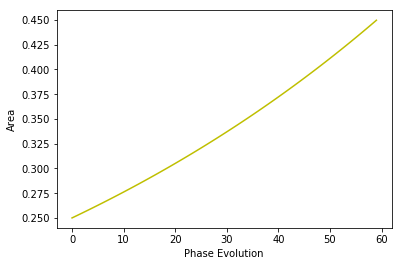

In [27]:
plt.plot(A,'y')

plt.xlabel('Phase Evolution')
plt.ylabel('Area')
plt.show()

In [28]:
# Clearly Phase space area is increasing in case of Euler method unlike euler crommer method

In [29]:
#Prob A Finding Jacobian



The jacobian of the above transformation is given as:
$$
J=\begin{vmatrix}
1-k(\delta t)^2 & \delta t\\
-k\delta t & 1\\
\end{vmatrix}
$$

In [34]:
g=10
l=5
tau=np.sqrt(g/l)
dt=tau/100


In [35]:
a=1-(l/g)*(dt**2)
b=dt
c=-(l/g)*dt
d=1

In [36]:
J= a*d-b*c # clearly Jacobian is given as this analytically

In [38]:
print(J)

1.0
